# Lab 7.05 - Time series analysis

In [2]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model.
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


<Axes: xlabel='Month'>

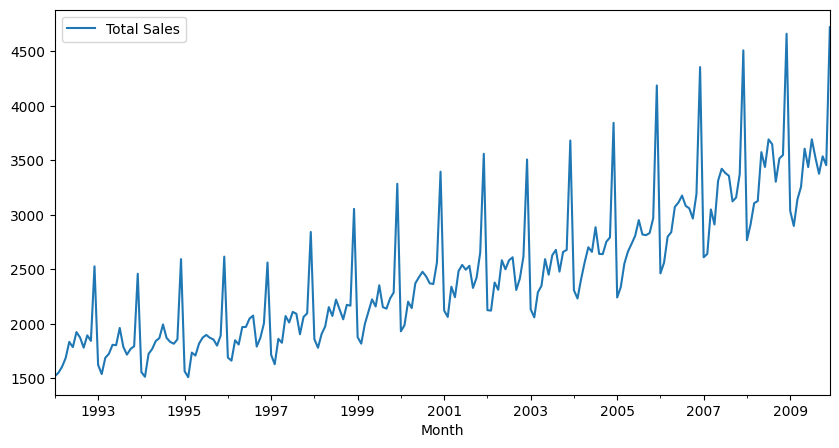

In [4]:
data.plot( y='Total Sales', figsize=[10,5])

y = 8.790415461008113 * x + 1516.067374978665


<Axes: ylabel='Total Sales'>

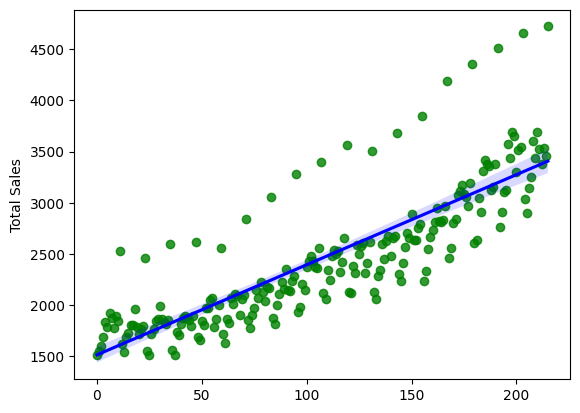

In [13]:
#trendlijn
# x kan niet overweg met datums, dus we maken zelf een x

x=np.arange(0,len(data['Total Sales']))
y=data['Total Sales']
a,b =np.polyfit(x,y,1)

print(f"y = {a} * x + {b}")

sns.regplot(x=np.arange(0,216), y=data['Total Sales'], line_kws={'color': 'b'}, scatter_kws={'color':'g'})


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Total Sales'][:-12]# starting from 2013 jan until 1 year ago (2021)-12 is a year ago
test = data.number_of_heavily_wounded[-12:] # starting from a year ago (-12) for the test

wounded_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()
# trend is additief ( a line); seasonal 'add'  of 'multiplicative', periode = 12 month a year , MS = months
train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(wounded_hw.level + wounded_hw.trend + wounded_hw.season).plot(legend=True, label='fitted')

<Axes: xlabel='Month'>

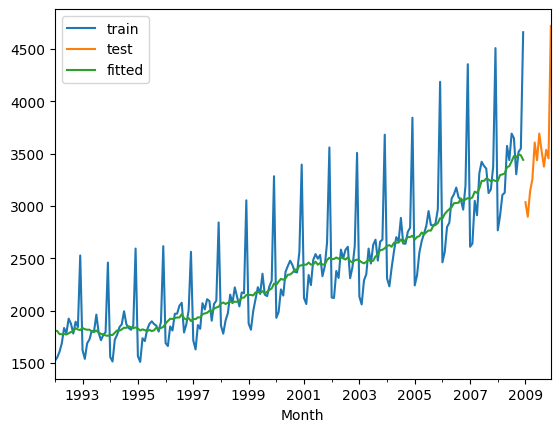

In [22]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Total Sales'][:-12]# starting from 2013 jan until 1 year ago (2021)-12 is a year ago
test = data['Total Sales'][-12:] # starting from a year ago (-12) for the test

sales_hw = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12, freq='MS').fit()
# trend is additief ( a line); seasonal 'add'  of 'multiplicative', periode = 12 month a year , MS = months
train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(sales_hw.level + sales_hw.trend + sales_hw.season).plot(legend=True, label='fitted')

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

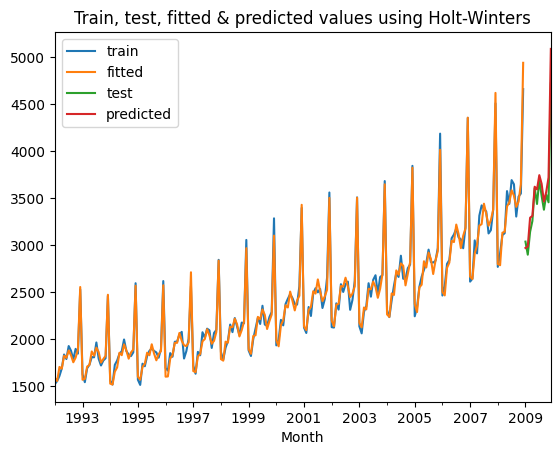

In [24]:
sales_predicted = sales_hw.forecast(12) # for next 12 month forecast

train.plot(legend=True, label='train')
sales_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
sales_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,sales_predicted)}')


MAE = 121.38897856160781


## Source
Business Analytics Data Analysis & Decision Making